<a href="https://colab.research.google.com/github/meriemdouider1/pfe/blob/main/cx_pipiens%20donne%20equilib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy 
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC

In [3]:
Cl = '/content/cx_pipien equi.xlsx'
data= pd.read_excel(Cl,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True)

In [4]:
data

,Source,CodeSite,X_long,Y_lat,Cx_pipiens,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,Bennouna,Z01-S01-G01,-15.911420,23.794740,0,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,Bennouna,Z01-S05-G01,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,Bennouna,Z01-S05-G02,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,Bennouna,Z01-S08-G01,-13.167180,27.157730,1,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
4,Bennouna,Z01-S11-G01,-13.207000,27.165000,1,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,0,0,0,0,0,0,0,0,26,2490,520,50,30,44,0,0,44,1920,3010,612,202,202,0,15266,299,121,23,73,...,29.400000,27.799999,25.299999,22.900000,12.2,13.0,14.3,14.9,15.800000,17.400000,18.900000,20.000000,19.500000,18.000000,15.400000,13.0,1.20,1.34,1.44,1.53,1.65,1.87,2.06,2.14,2.12,1.98,1.63,1.41,4.3,4.5,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Trari,Trari_254,-5.333333,35.266667,1,11.136305,139.052841,8.974447,27.155428,0.614620,0,0,0,0,0,0,0,0,100,0,0,1910,470,130,70,66,5,2,73,1480,2470,782,123,212,0,14998,628,105,12,92,...,25.799999,21.200001,17.799999,14.500000,3.8,4.7,7.1,9.7,11.900000,16.500000,21.500000,21.100000,17.900000,13.400000,9.900000,6.6,0.90,0.95,1.00,1.07,1.24,1.46,1.60,1.67,1.56,1.35,1.11,0.99,3.3,3.5,3.6,3.8,3.4,3.5,3.3,3.0,3.1,3.3,3.2,3.1
206,Trari,Trari_256,-5.218206,35.348765,1,24.167864,101.951973,6.131610,13.230689,0.796660,0,0,0,23,13,14,11,7,31,0,0,1790,300,70,20,67,4,0,71,1450,2080,610,216,377,0,14747,538,85,13,91,...,24.600000,18.799999,15.400000,12.700000,3.6,4.2,6.3,8.9,11.400000,15.500000,19.900000,19.799999,17.400000,11.600000,8.200000,5.5,0.84,0.88,0.92,0.99,1.13,1.32

In [5]:
del data["Source"]
del data["CodeSite"]

In [6]:
data

,X_long,Y_lat,Cx_pipiens,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.167180,27.157730,1,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
4,-13.207000,27.165000,1,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,0,0,0,0,0,0,0,0,26,2490,520,50,30,44,0,0,44,1920,3010,612,202,202,0,15266,299,121,23,73,12,0,...,29.400000,27.799999,25.299999,22.900000,12.2,13.0,14.3,14.9,15.800000,17.400000,18.900000,20.000000,19.500000,18.000000,15.400000,13.0,1.20,1.34,1.44,1.53,1.65,1.87,2.06,2.14,2.12,1.98,1.63,1.41,4.3,4.5,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-5.333333,35.266667,1,11.136305,139.052841,8.974447,27.155428,0.614620,0,0,0,0,0,0,0,0,100,0,0,1910,470,130,70,66,5,2,73,1480,2470,782,123,212,0,14998,628,105,12,92,3,0,...,25.799999,21.200001,17.799999,14.500000,3.8,4.7,7.1,9.7,11.900000,16.500000,21.500000,21.100000,17.900000,13.400000,9.900000,6.6,0.90,0.95,1.00,1.07,1.24,1.46,1.60,1.67,1.56,1.35,1.11,0.99,3.3,3.5,3.6,3.8,3.4,3.5,3.3,3.0,3.1,3.3,3.2,3.1
206,-5.218206,35.348765,1,24.167864,101.951973,6.131610,13.230689,0.796660,0,0,0,23,13,14,11,7,31,0,0,1790,300,70,20,67,4,0,71,1450,2080,610,216,377,0,14747,538,85,13,91,2,0,...,24.600000,18.799999,15.400000,12.700000,3.6,4.2,6.3,8.9,11.400000,15.500000,19.900000,19.799999,17.400000,11.600000,8.200000,5.5,0.84,0.88,0.92,0.99,1.13,1.32,1.45,1.53,1.44,1.25,1.04,0.94,4.0,4.7,5.0,4.6,4.2,3.5,3.5,3.6,4.0,4.3,3.9,3.8
207,-6.03333

In [8]:
(data[data["Cx_pipiens"]==1]).count


<bound method DataFrame.count of         X_long      Y_lat  Cx_pipiens  ...  Vent_Oct  Vent_Nov  Vent_Dec
3   -13.167180  27.157730           1  ...       4.2       3.6       3.8
4   -13.207000  27.165000           1  ...       4.6       3.8       3.9
5   -13.214230  27.166700           1  ...       4.4       3.6       3.8
6   -13.214230  27.166700           1  ...       4.4       3.6       3.8
7   -13.214230  27.166700           1  ...       4.4       3.6       3.8
..         ...        ...         ...  ...       ...       ...       ...
205  -5.333333  35.266667           1  ...       3.3       3.2       3.1
206  -5.218206  35.348765           1  ...       4.3       3.9       3.8
207  -6.033333  35.466667           1  ...       3.1       3.4       3.4
208  -5.366667  35.566667           1  ...       3.7       3.5       3.5
209  -5.833954  35.759465           1  ...       3.5       3.8       3.9

[105 rows x 226 columns]>

In [9]:
(data[data["Cx_pipiens"]==0]).count


<bound method DataFrame.count of        X_long     Y_lat  Cx_pipiens  ...  Vent_Oct  Vent_Nov  Vent_Dec
0   -15.91142  23.79474           0  ...       5.4       5.5       4.9
1   -13.18837  27.13295           0  ...       4.3       3.7       3.8
2   -13.18837  27.13295           0  ...       4.3       3.7       3.8
10  -10.27508  29.08243           0  ...       3.5       3.5       3.4
11   -9.49015  29.21906           0  ...       3.8       3.2       3.1
..        ...       ...         ...  ...       ...       ...       ...
125  -6.20400  30.68600           0  ...       3.1       3.5       3.3
126  -6.23900  30.69500           0  ...       2.7       3.0       3.2
127  -6.91000  30.91300           0  ...       2.7       2.9       2.8
128  -6.86400  30.86600           0  ...       3.4       3.4       3.6
130  -4.98700  31.72800           0  ...       2.5       2.3       2.4

[105 rows x 226 columns]>

In [10]:
X1 = data.loc[:, data.columns != 'Cx_pipiens']
y1 = data.Cx_pipiens

In [11]:
X1

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
4,-13.207000,27.165000,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,0,0,0,0,0,0,0,0,26,2490,520,50,30,44,0,0,44,1920,3010,612,202,202,0,15266,299,121,23,73,12,0,85,...,29.400000,27.799999,25.299999,22.900000,12.2,13.0,14.3,14.9,15.800000,17.400000,18.900000,20.000000,19.500000,18.000000,15.400000,13.0,1.20,1.34,1.44,1.53,1.65,1.87,2.06,2.14,2.12,1.98,1.63,1.41,4.3,4.5,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-5.333333,35.266667,11.136305,139.052841,8.974447,27.155428,0.614620,0,0,0,0,0,0,0,0,100,0,0,1910,470,130,70,66,5,2,73,1480,2470,782,123,212,0,14998,628,105,12,92,3,0,95,...,25.799999,21.200001,17.799999,14.500000,3.8,4.7,7.1,9.7,11.900000,16.500000,21.500000,21.100000,17.900000,13.400000,9.900000,6.6,0.90,0.95,1.00,1.07,1.24,1.46,1.60,1.67,1.56,1.35,1.11,0.99,3.3,3.5,3.6,3.8,3.4,3.5,3.3,3.0,3.1,3.3,3.2,3.1
206,-5.218206,35.348765,24.167864,101.951973,6.131610,13.230689,0.796660,0,0,0,23,13,14,11,7,31,0,0,1790,300,70,20,67,4,0,71,1450,2080,610,216,377,0,14747,538,85,13,91,2,0,93,...,24.600000,18.799999,15.400000,12.700000,3.6,4.2,6.3,8.9,11.400000,15.500000,19.900000,19.799999,17.400000,11.600000,8.200000,5.5,0.84,0.88,0.92,0.99,1.13,1.32,1.45,1.53,1.44,1.25,1.04,0.94,4.0,4.7,5.0,4.6,4.2,3.5,3.5,3.6,4.0,4.3,3.9,3.8
20

In [12]:
y1

0      0
1      0
2      0
3      1
4      1
      ..
205    1
206    1
207    1
208    1
209    1
Name: Cx_pipiens, Length: 210, dtype: int64

In [13]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score


XGBClassifier


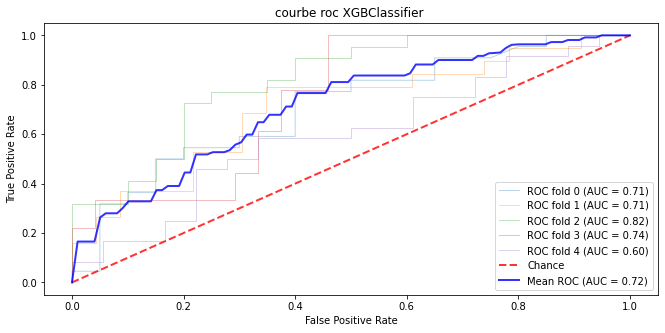

Accuracy: [0.66666667 0.69047619 0.73809524 0.64285714 0.5952381 ]
moy_accuracy: 0.67
precision: [0.66666667 0.65       0.76190476 0.57142857 0.70588235]
moy_precision: 0.67
sensibilité : [0.72727273 0.68421053 0.72727273 0.66666667 0.5       ]
moy_sensibilité: 0.66
spécificité : [0.6        0.69565217 0.75       0.625      0.72222222]
moy_spécificité: 0.68
MCC : [0.33028913 0.3785655  0.47673129 0.28867513 0.22404481]
MCC: 0.34
balanced_accuracy : [0.66363636 0.68993135 0.73863636 0.64583333 0.61111111]
balanced_accuracy: 0.67
roc_auc : [0.71022727 0.70709382 0.81818182 0.74305556 0.59722222]
roc_auc: 0.72
cohen_kappa_scorec : [0.32876712 0.37813212 0.47619048 0.28571429 0.21192053]
cohen_kappa_scorec: 0.34
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


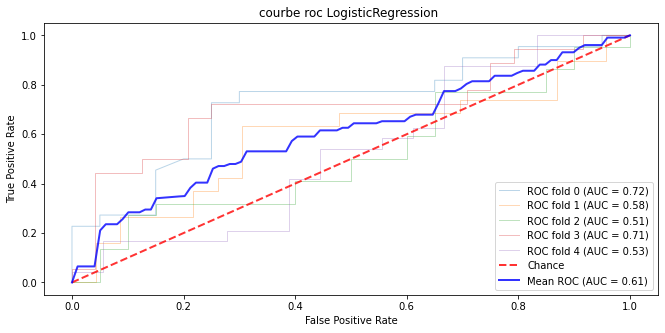

Accuracy: [0.71428571 0.64285714 0.47619048 0.69047619 0.5       ]
moy_accuracy: 0.60
precision: [0.72727273 0.61111111 0.5        0.61904762 0.58823529]
moy_precision: 0.61
sensibilité : [0.72727273 0.57894737 0.45454545 0.72222222 0.41666667]
moy_sensibilité: 0.58
spécificité : [0.7        0.69565217 0.5        0.66666667 0.61111111]
moy_spécificité: 0.63
MCC : [ 0.42727273  0.27618409 -0.04545455  0.38490018  0.0280056 ]
MCC: 0.21
balanced_accuracy : [0.71363636 0.63729977 0.47727273 0.69444444 0.51388889]
balanced_accuracy: 0.61
roc_auc : [0.71477273 0.60869565 0.51363636 0.72453704 0.49768519]
roc_auc: 0.61
cohen_kappa_scorec : [ 0.42727273  0.27586207 -0.04524887  0.38095238  0.02649007]
cohen_kappa_scorec: 0.21
RandomForestClassifier


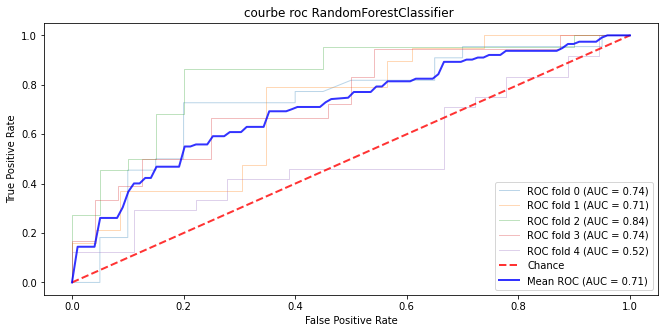

Accuracy: [0.69047619 0.61904762 0.78571429 0.66666667 0.45238095]
moy_accuracy: 0.64
precision: [0.68       0.57894737 0.8        0.61904762 0.63157895]
moy_precision: 0.66
sensibilité : [0.77272727 0.57894737 0.77272727 0.66666667 0.5       ]
moy_sensibilité: 0.66
spécificité : [0.65       0.65217391 0.7        0.625      0.66666667]
moy_spécificité: 0.66
MCC : [ 0.42662346  0.17951966  0.38138504  0.41666667 -0.04128614]
MCC: 0.27
balanced_accuracy : [0.68636364 0.58924485 0.78636364 0.71527778 0.45138889]
balanced_accuracy: 0.65
roc_auc : [0.72386364 0.70480549 0.83636364 0.75694444 0.48842593]
roc_auc: 0.70
cohen_kappa_scorec : [ 0.37528604  0.13501144  0.61818182  0.43243243 -0.0952381 ]
cohen_kappa_scorec: 0.29
GradientBoostingClassifier


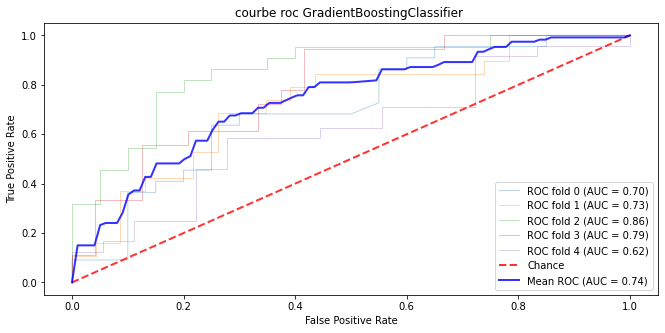

Accuracy: [0.66666667 0.64285714 0.78571429 0.69047619 0.57142857]
moy_accuracy: 0.67
precision: [0.68181818 0.625      0.7826087  0.61904762 0.6875    ]
moy_precision: 0.68
sensibilité : [0.68181818 0.52631579 0.81818182 0.72222222 0.45833333]
moy_sensibilité: 0.64
spécificité : [0.65       0.73913043 0.75       0.66666667 0.72222222]
moy_spécificité: 0.71
MCC : [0.33181818 0.2720637  0.57012876 0.38490018 0.18399502]
MCC: 0.35
balanced_accuracy : [0.66590909 0.63272311 0.78409091 0.69444444 0.59027778]
balanced_accuracy: 0.67
roc_auc : [0.70340909 0.72540046 0.86136364 0.78703704 0.61574074]
roc_auc: 0.74
cohen_kappa_scorec : [0.33181818 0.26914153 0.56947608 0.38095238 0.17105263]
cohen_kappa_scorec: 0.34
GaussianNB


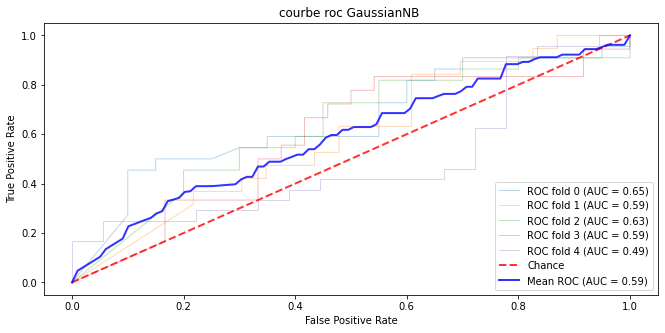

Accuracy: [0.5952381  0.57142857 0.57142857 0.57142857 0.45238095]
moy_accuracy: 0.55
precision: [0.63157895 0.54545455 0.59090909 0.5        0.53846154]
moy_precision: 0.56
sensibilité : [0.54545455 0.31578947 0.59090909 0.33333333 0.29166667]
moy_sensibilité: 0.42
spécificité : [0.65       0.7826087  0.55       0.75       0.66666667]
moy_spécificité: 0.68
MCC : [ 0.19612429  0.11139111  0.14090909  0.09128709 -0.04460258]
MCC: 0.10
balanced_accuracy : [0.59772727 0.54919908 0.57045455 0.54166667 0.47916667]
balanced_accuracy: 0.55
roc_auc : [0.65340909 0.59267735 0.62954545 0.59490741 0.48842593]
roc_auc: 0.59
cohen_kappa_scorec : [ 0.19413093  0.10213777  0.14090909  0.08695652 -0.03870968]
cohen_kappa_scorec: 0.10
KNeighborsClassifier


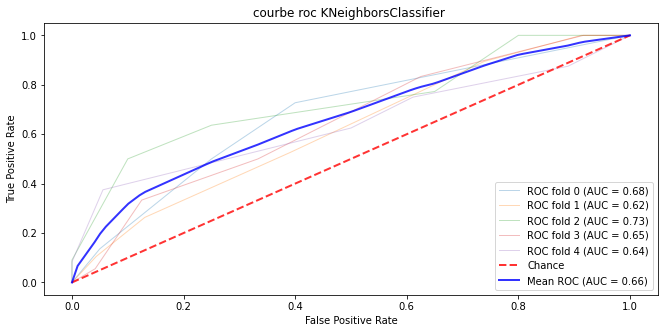

Accuracy: [0.66666667 0.57142857 0.69047619 0.5952381  0.57142857]
moy_accuracy: 0.62
precision: [0.66666667 0.52631579 0.73684211 0.52941176 0.625     ]
moy_precision: 0.62
sensibilité : [0.72727273 0.52631579 0.63636364 0.5        0.625     ]
moy_sensibilité: 0.60
spécificité : [0.6        0.60869565 0.75       0.66666667 0.5       ]
moy_spécificité: 0.63
MCC : [0.33028913 0.13501144 0.38768756 0.16803361 0.125     ]
MCC: 0.23
balanced_accuracy : [0.66363636 0.56750572 0.69318182 0.58333333 0.5625    ]
balanced_accuracy: 0.61
roc_auc : [0.67727273 0.6201373  0.72954545 0.64930556 0.6412037 ]
roc_auc: 0.66
cohen_kappa_scorec : [0.32876712 0.13501144 0.38374718 0.16783217 0.125     ]
cohen_kappa_scorec: 0.23


In [15]:
classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=7,n_estimators=1000,subsample=0.9,
 colsample_bytree=0.9),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
def tp2(y_true, y_pred): 
    value = cohen_kappa_score(y_true,y_pred)
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split(X1, y1)):
         clf.fit(X1.loc[train,], y1.loc[train,])
         viz = plot_roc_curve(clf, X1.loc[test,], y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X1, y1, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X1, y1, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X1, y1, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


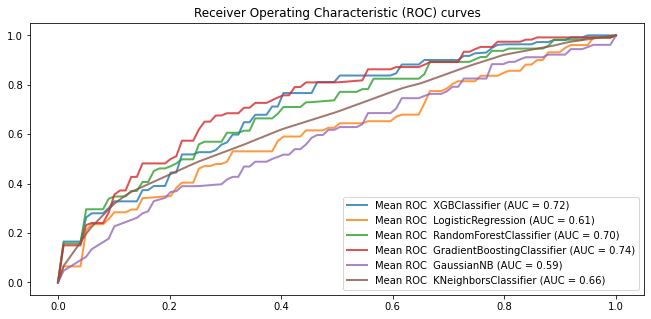

In [16]:
classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=7,n_estimators=1000,subsample=0.9,
 colsample_bytree=0.9),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5)

}

# prepare plots
fig, ax_roc = plt.subplots(figsize=(11, 5))
cv = KFold(n_splits=5, random_state=1, shuffle=True)
random_state = np.random.RandomState(0)
for name, clf in classifiers.items():
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    for i, (train, test) in enumerate(cv.split(X1, y1)):
        clf.fit(X1.loc[train,], y1.loc[train,])
        viz = plot_roc_curve(clf, X1.loc[test,], y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax_roc.plot(mean_fpr, mean_tpr,
    label=r'Mean ROC  %s (AUC = %0.2f)' % (name, mean_auc),
        lw=2, alpha=.8)

ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')

plt.legend()
plt.show()

In [17]:
classifiers = {
   "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=7,n_estimators=1000,subsample=0.9,
 colsample_bytree=0.9),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5)

}
for name, clf in classifiers.items():
    print(name)
    # prepare the cross-validation procedure
    loo =LeaveOneOut()
    # evaluate model
    scores1 = cross_val_score(clf, X1, y1, scoring='accuracy', cv=loo, n_jobs=-1)
    # report performance
    print('accuracy: %.2f' % mean(scores1))

XGBClassifier
accuracy: 0.68
LogisticRegression
accuracy: 0.64
RandomForestClassifier
accuracy: 0.67
GradientBoostingClassifier
accuracy: 0.69
GaussianNB
accuracy: 0.60
KNeighborsClassifier
accuracy: 0.66
